In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
import pandas as pd
df = pd.DataFrame(digits["data"], columns=digits["feature_names"])
df["class"] = [digits["target_names"][target] for target in digits["target"]]

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km.fit(digits["data"])

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [4]:
import numpy as np
counts = np.zeros((10, 10))
for i in range(len(digits["target"])):
    counts[digits["target"][i]][km.labels_[i]] += 1

<Axes: >

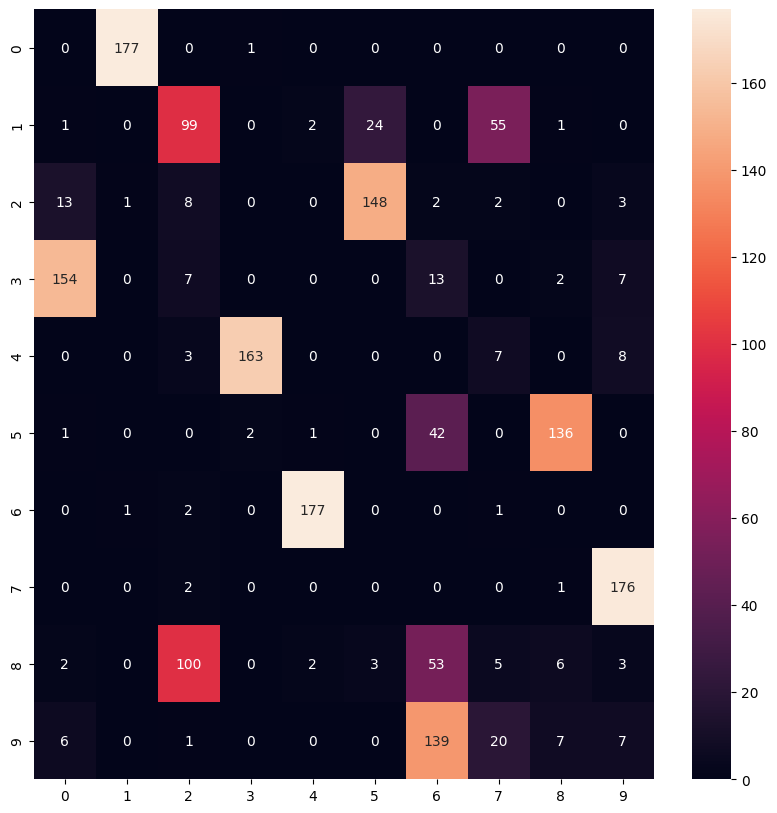

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(counts, annot=True, fmt=".0f")

In [6]:
!pip install umap-learn[parametric_umap]

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/umap/distances.

<Axes: xlabel='x', ylabel='y'>

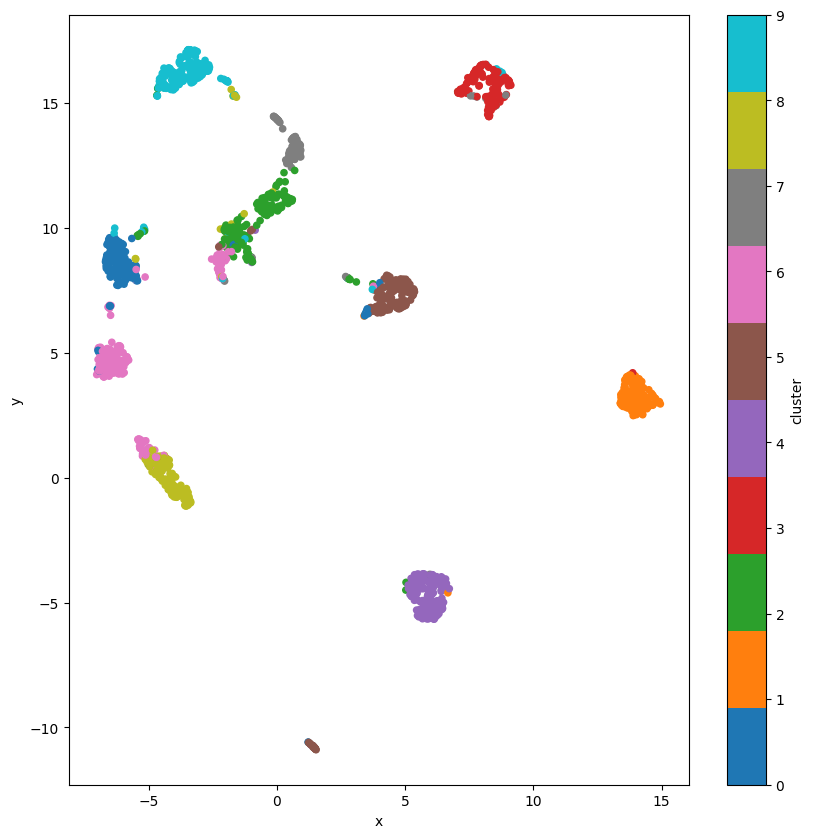

In [7]:
import umap
umap2 = umap.UMAP(n_components=2, random_state=42)
udf = pd.DataFrame(umap2.fit_transform(digits["data"], ), columns=["x", "y"])
udf["target"] = digits["target"]
udf["cluster"] = km.labels_
udf.plot.scatter(x='x', y='y', c="cluster", figsize=(10,10), cmap="tab10")

<Axes: xlabel='x', ylabel='y'>

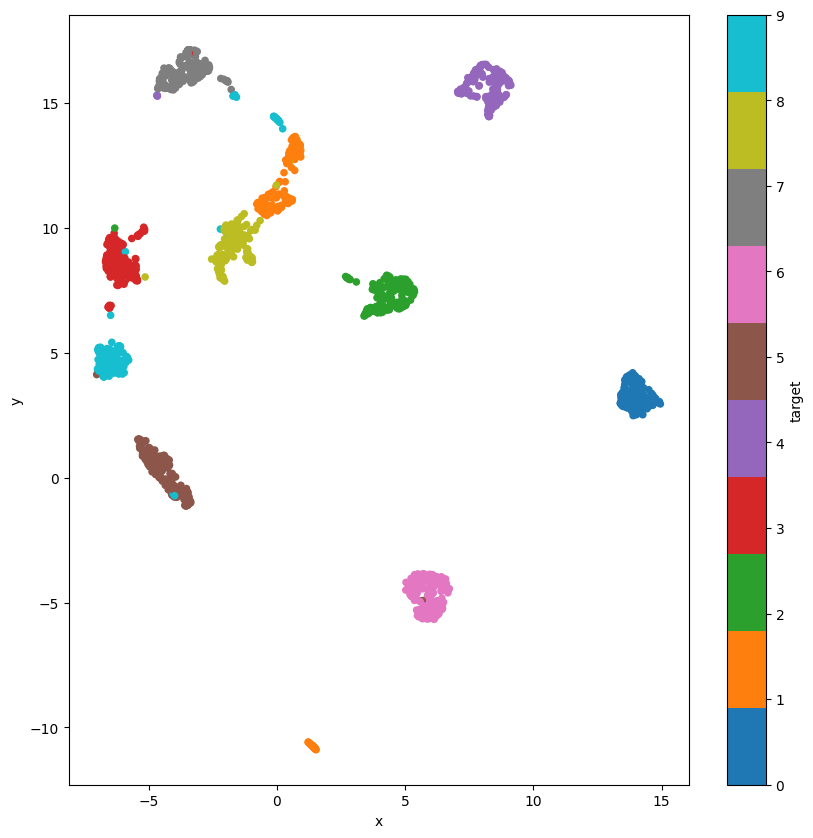

In [8]:
udf.plot.scatter(x='x', y='y', c="target", figsize=(10,10), cmap="tab10")

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='x', ylabel='y'>

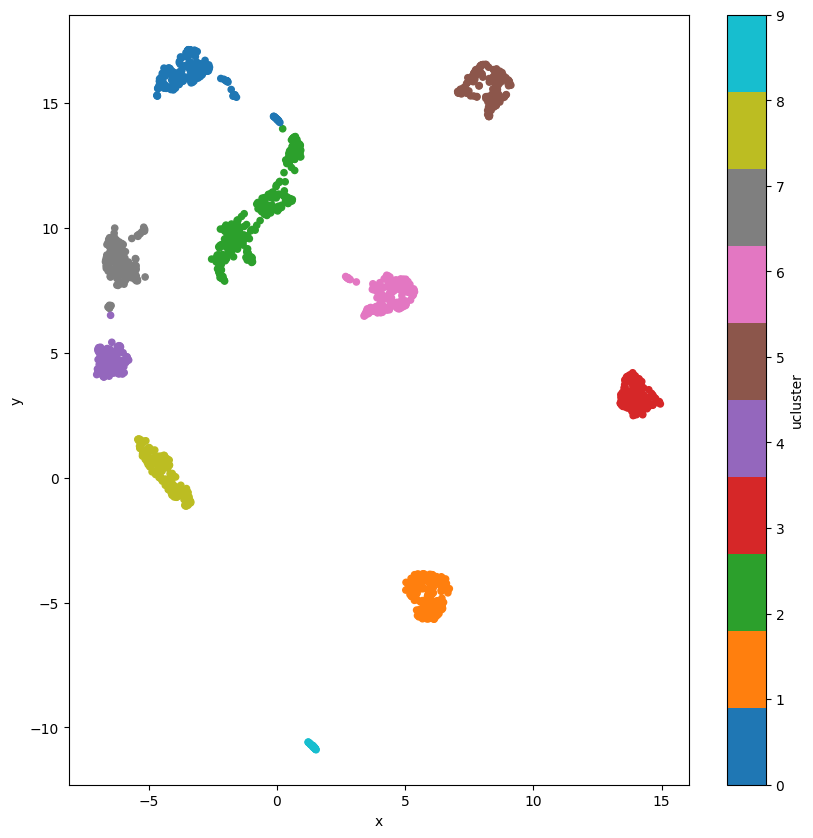

In [9]:
kmu = KMeans(n_clusters=10)
kmu.fit(udf[["x", "y"]])
udf["ucluster"] = kmu.labels_
udf.plot.scatter(x='x', y='y', c="ucluster", figsize=(10,10), cmap="tab10")

<Axes: >

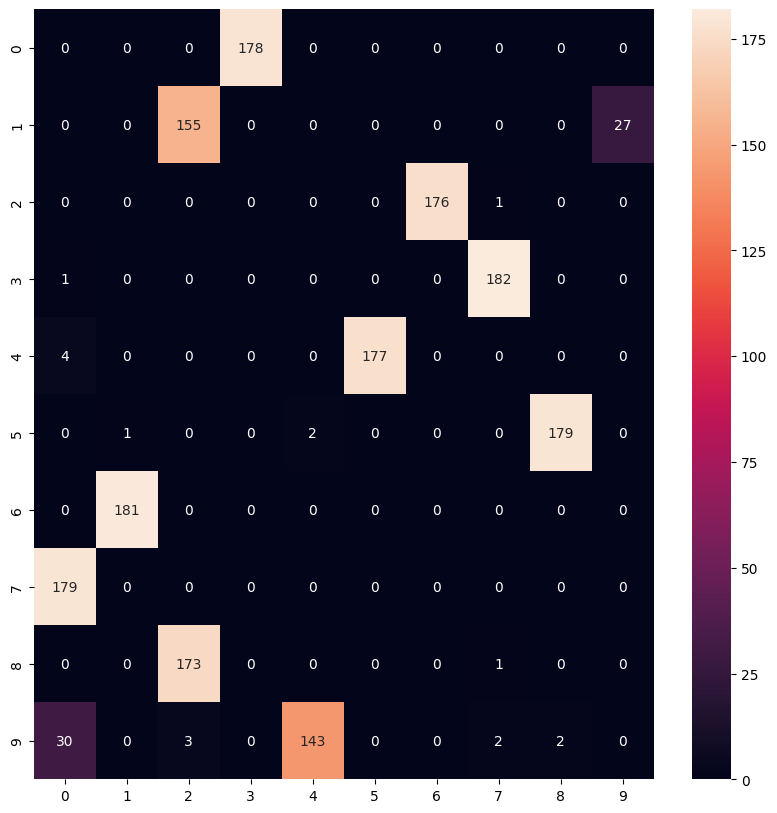

In [10]:
ucounts = np.zeros((10, 10))
for i in range(len(digits["target"])):
    ucounts[digits["target"][i]][kmu.labels_[i]] += 1
plt.figure(figsize=(10, 10))
sns.heatmap(ucounts, annot=True, fmt=".0f")

In [11]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=10)
birch.fit(digits["data"])

Birch(n_clusters=10)

<Axes: >

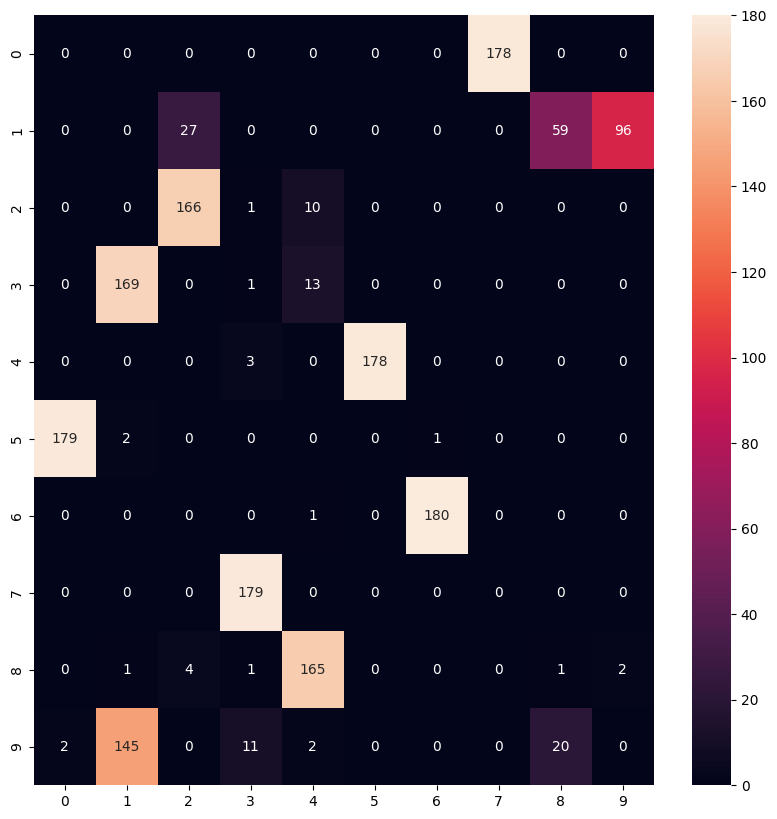

In [12]:
bcounts = np.zeros((10, 10))
for i in range(len(digits["target"])):
    bcounts[digits["target"][i]][birch.labels_[i]] += 1
    
plt.figure(figsize=(10, 10))
sns.heatmap(bcounts, annot=True, fmt=".0f")

In [13]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(digits["data"])

MeanShift()

In [14]:
np.unique(ms.labels_, return_counts=True)

(array([0]), array([1797]))

In [15]:
msu = MeanShift()
msu.fit(udf[["x", "y"]])
np.unique(msu.labels_, return_counts=True)

(array([0, 1, 2]), array([1321,  209,  267]))

In [16]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN()
dbs.fit(digits["data"])
np.unique(dbs.labels_, return_counts=True)

(array([-1]), array([1797]))

In [17]:
dbsu = DBSCAN()
dbsu.fit(udf[["x", "y"]])
np.unique(dbsu.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([178, 330,  10, 174, 177, 144, 182, 172, 166, 181,  23,  20,  27,
         13]))

<Axes: >

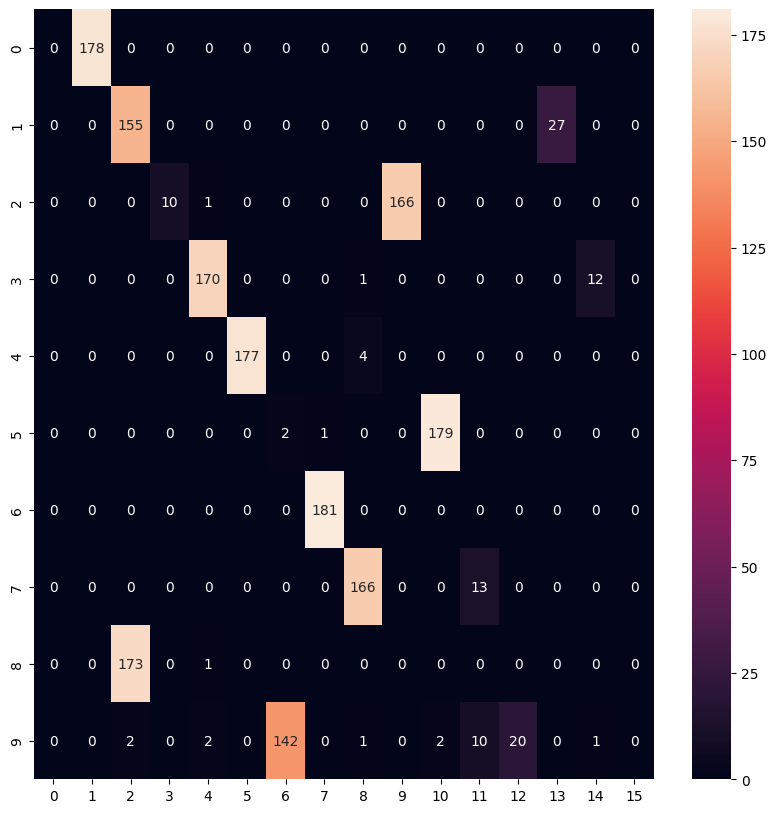

In [18]:
dcounts = np.zeros((10, 16))
for i in range(len(digits["target"])):
    dcounts[digits["target"][i]][dbsu.labels_[i]+1] += 1
    
plt.figure(figsize=(10, 10))
sns.heatmap(dcounts, annot=True, fmt=".0f")